In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
df_new = pd.read_csv('newton.csv')
df_hor = pd.read_csv('horner.csv')

print(df_new.columns)
new_x = np.array(df_new['x']) 
new_y = np.array(df_new['y'])
hor_x = np.array(df_hor['x'])
hor_a = np.array(df_hor['a'][df_hor['a'].isna() == False])

Index(['x', 'y'], dtype='object')


horner total time: 1.546487
normal total time: 2.783459


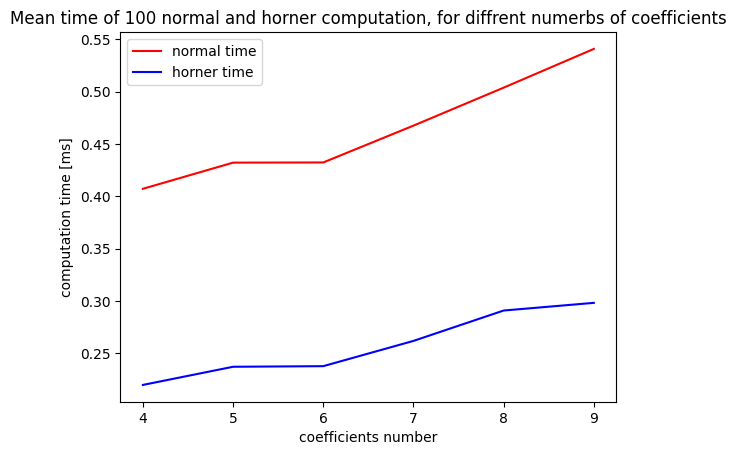

<Figure size 640x480 with 0 Axes>

In [146]:
def horner(a : np, x : float):
    result = a[0]
    for a_i in a[1:]:
        result = result * x + a_i
    return result

def normal_compute(a : np, x : float):
    return sum(a_i * x ** k for k, a_i in enumerate(a[::-1]))

summary = pd.DataFrame(columns=['horner_time', 'normal_time'])
coefs = range(4, len(hor_a))

for i in coefs: 
    summary_temp = pd.DataFrame(columns=['horner_time', 'normal_time'])
    a = hor_a[:i]

    for j in range(100):  

        horner_start_time = time.perf_counter_ns()
        for x in hor_x:
            horner(a, x)
        horner_time = time.perf_counter_ns() - horner_start_time

        normal_start_time = time.perf_counter_ns()
        for x in hor_x:
            normal_compute(a, x)
        normal_time = time.perf_counter_ns() - normal_start_time

        summary_temp.loc[j] = {'horner_time': horner_time, 'normal_time': normal_time}

    summary.loc[i] = {'horner_time': summary_temp['horner_time'].mean(), 'normal_time': summary_temp['normal_time'].mean()}

print('horner total time:', summary['horner_time'].sum() / 1000000)
print('normal total time:', summary['normal_time'].sum() / 1000000)

plt.plot(coefs, summary['normal_time'] / 1000000, label='normal time', c ='r')
plt.plot(coefs, summary['horner_time'] / 1000000, label='horner time', c='b')
plt.title('Mean time of 100 normal and horner computation, for diffrent numerbs of coefficients')
plt.ylabel('computation time [ms]')
plt.xlabel('coefficients number')
plt.legend()
plt.show()
plt.clf()

hor_y = []
for x in hor_x:
    hor_y.append(normal_compute(a, x))

In [22]:
def mse(x, y):
    return sum([(xi - yi) ** 2 for xi, yi in zip(x, y)]) / len(x)

In [156]:
def first_instance(X, Y, i):
    return (Y[i + 1] - Y[i]) / (X[i + 1] - X[i])

def newton(X, Y, k, i):
    if k == 0:
        return 1
    if k == 1:
        return first_instance(X, Y, i)
    return (newton(X, Y, k - 1, i + 1) - newton(X, Y, k - 1, i)) / (X[i + k] - X[i])

def calculate(X, Y, x):
    coefs_newton= []
    result = Y[0]  
    for i in range(len(X)):  
        tmp = 1  
        for j in range(i):
            tmp *= x - X[j]
        coefs_newton.append(newton(X, Y, i, 0))  
        result += tmp * coefs_newton[-1]
    return result, coefs_newton

nodes_frequency = 18
nodes_x = hor_x[0::nodes_frequency]
nodes_y = hor_y[0::nodes_frequency]

predictions = []
for x_i in hor_x:
    h, coefs_newton = calculate(nodes_x, nodes_y, x_i)
    print(x_i,',',h)
    predictions.append(h)

predictions = np.array(predictions)
m_s_e = mse(predictions, new_y)
print('mse:',m_s_e)

-8.0 , 119499862.0
-7.6475 , 89821905.08132342
-7.3089 , 67284358.37155081
-6.9835 , 50203045.48889806
-6.6708 , 37293106.84533354
-6.3704 , 27568057.333980493
-6.0818 , 20265758.367420338
-5.8045 , 14802082.874490332
-5.538 , 10730255.726980561
-5.2819 , 7710298.51334323
-5.0359 , 5483334.841009035
-4.7995 , 3850431.890794638
-4.5724 , 2661984.250051773
-4.3542 , 1804039.3723430866
-4.1445 , 1190671.7345526835
-3.943 , 757492.6260054926
-3.7495 , 456262.0049303259
-3.5635 , 250517.21034374222
-3.3848 , 113546.26237332821
-3.213 , 25424.46478679648
-3.048 , -28355.68135913658
-2.8895 , -58491.097353175195
-2.7372 , -72704.14744755562
-2.5908 , -76514.34024433297
-2.4502 , -73826.95405900877
-2.3151 , -67367.992524167
-2.1853 , -58998.41541233676
-2.0605 , -49949.101635089406
-1.9407 , -41027.72330076377
-1.8255 , -32698.763750237107
-1.7149 , -25237.942311732644
-1.6085 , -18746.207876017186
-1.5064 , -13258.750623556232
-1.4082 , -8720.499424096084
-1.3139 , -5061.649616840361
-1.2233

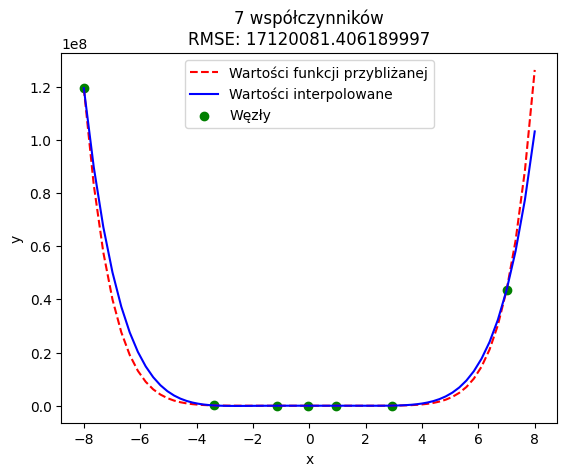


 współczynniki: 1, -25868069.8, 3761412.15, -470690.09, 52211.1, -4694.06, 503.61
prawdziwe wspolczynniki:  [ 7.4  1.7 -4.6 -3.6  0.3 -1.6 -9.  -5.2  5.  -6.4]


<Figure size 640x480 with 0 Axes>

In [159]:
plt.plot(hor_x, hor_y, 'r--', label = 'Wartości funkcji przybliżanej')
plt.plot(hor_x, predictions, 'b', label = 'Wartości interpolowane')
plt.scatter(nodes_x, nodes_y, c='g', label = 'Węzły')
plt.title(str(len(coefs_newton)) + ' współczynników\n' + 'RMSE: ' + str(np.sqrt(m_s_e)))
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim([-8, 8])
#plt.ylim([-1000, 1000])
plt.legend()
plt.show()
plt.clf()
print('\n współczynniki: ' + ', '.join(map(lambda x: str(round(x,2)), coefs_newton)))
print('prawdziwe wspolczynniki: ', hor_a)